In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Distribution of points
First lets consider the distribution of points. For this analysis, the score is defined as the number of points away from 21 a player is, with a bust being an automatic 0. We can see the distribution does begin to tighten up around 17.

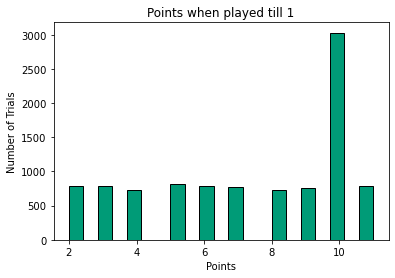

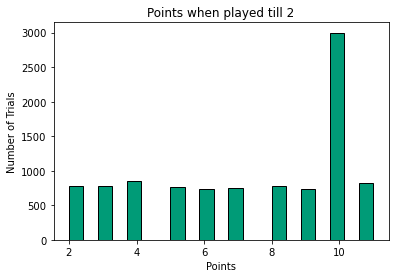

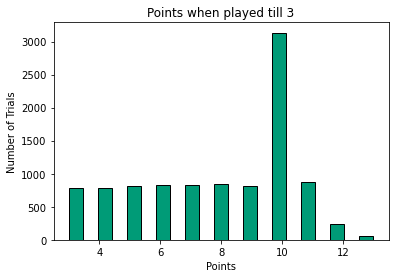

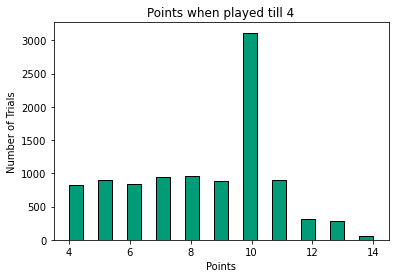

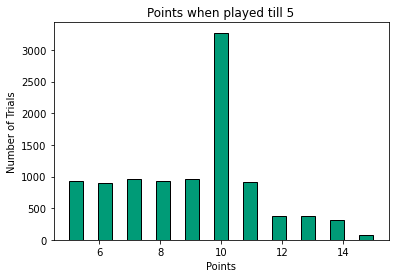

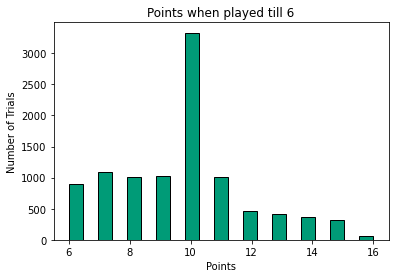

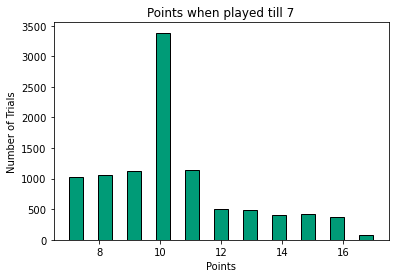

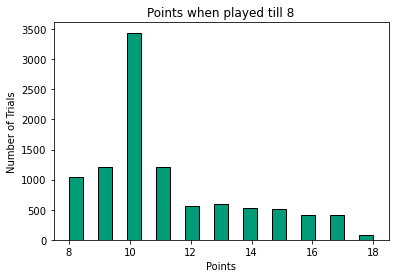

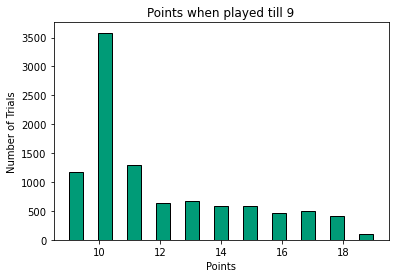

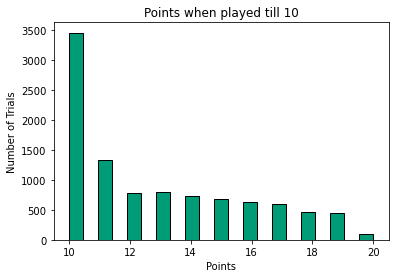

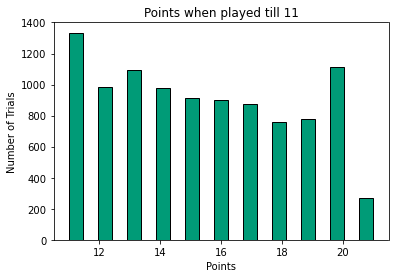

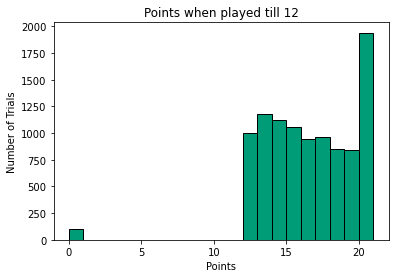

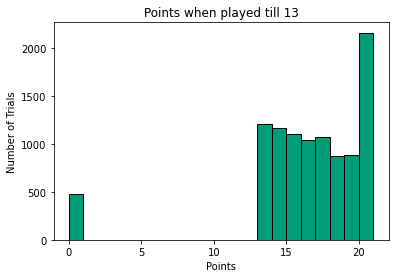

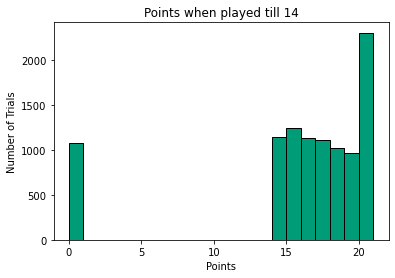

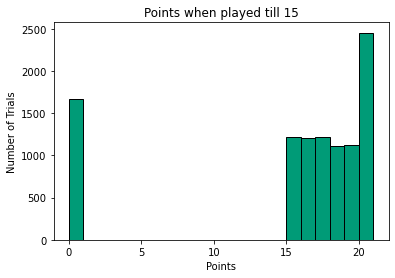

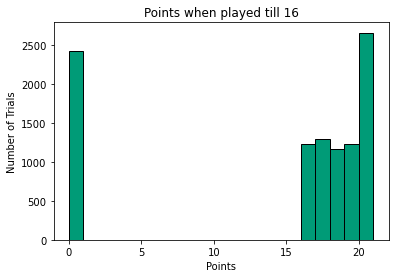

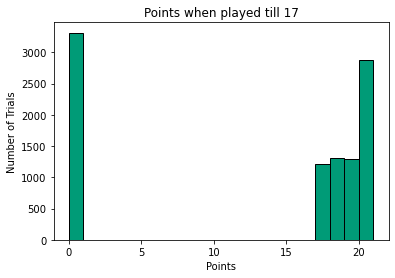

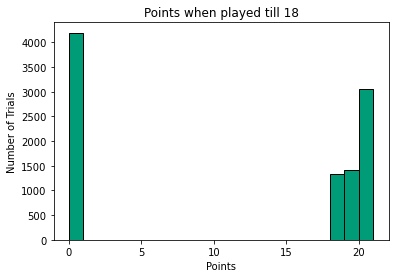

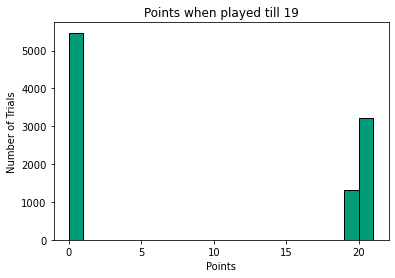

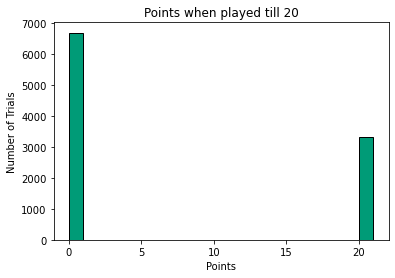

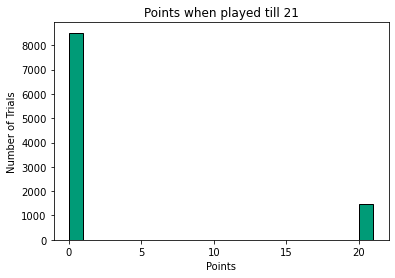

In [13]:
# get keys from df
keys = df.keys()
for key in keys:
    plt.hist(df[key], bins=21, color='#009B77', edgecolor='black')
    plt.title(f"Points when played till {key}")
    plt.xlabel("Points")
    plt.ylabel("Number of Trials")
    plt.show()

# Probability of a bust
Another important factor to consider is the likelihood of busting or losing all together. We can examine this with a single bar graph, by getting the probability of a bust for a single threshold. 

In [44]:
def probability_of_bust(results: list):
    """Returns the probability of busting given a list of results"""
    busts = 0
    for result in results:
        if result == 0:
            busts += 1
    return busts / len(results)

In [45]:
keys = []
bust_probability = []

for key in df.keys():
    keys.append(key)
    bust_probability.append(probability_of_bust(df[key].tolist()))

In [46]:
print(bust_probability)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0099, 0.0481, 0.1079, 0.1674, 0.2423, 0.3313, 0.4195, 0.5471, 0.6693, 0.8515]


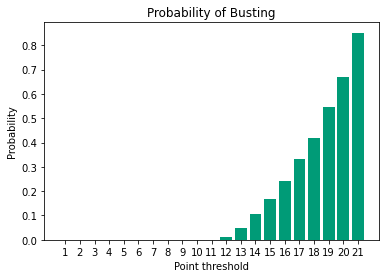

In [47]:
plt.bar(keys, bust_probability, color='#009B77')
plt.title("Probability of Busting")
plt.xlabel("Point threshold")
plt.ylabel("Probability")
plt.show()

# Average Number of Points
The next factor to consider would be the average number of points scoted. There would be 2 ways to consider this, with the 0s and without. I will showcase both.

In [48]:
def average_points(results: list, include_busts=False):
    """Returns the average points given a list of results"""
    total = 0
    if include_busts:
      for result in results:
          total += result
      return total / len(results)
    else:
      for result in results:
          if result != 0:
              total += result
      return total / (len(results) - results.count(0))
    

In [ ]:
plt.bar(keys, [average_points(df[key].tolist()) for key in keys], color='#009B77')
plt.title("Average Points (without busts)")
plt.xlabel("Point threshold")
plt.ylabel("Average Points")
plt.show()

plt.bar(keys, [average_points(df[key].tolist(), include_busts=True) for key in keys], color='#009B77')
plt.title("Average Points (with busts)")
plt.xlabel("Point threshold")
plt.ylabel("Average Points")
plt.show()